# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [17]:
# your code here
def dice_rolling():
    rolls = random.choices(range(1, 7), k=10)
    df = pd.DataFrame({'roll': rolls})
    return df

dice_rolls = dice_rolling()
dice_rolls

,roll
0,1
1,1
2,4
3,5
4,2
5,1
6,1
7,1
8,2
9,6


#### 2.- Plot the results sorted by value.

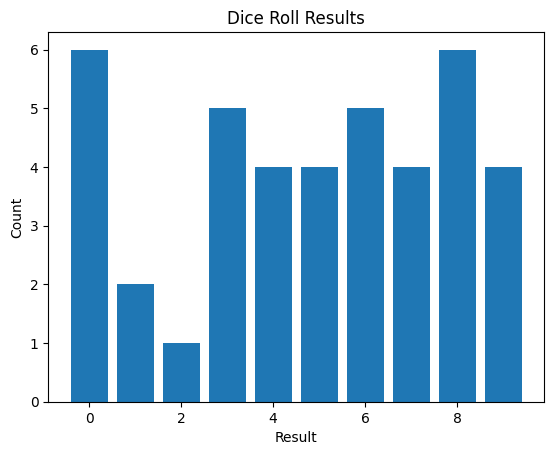

In [18]:
# your code here

dice_results = dice_rolls.sort_values('roll')

plt.bar(sorted_df.index, sorted_df['roll'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Dice Roll Results')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

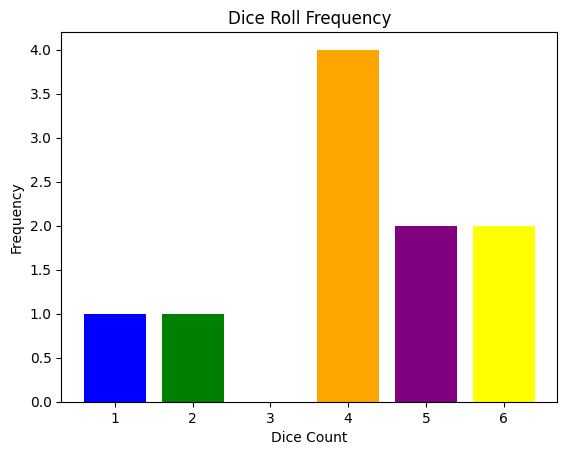

In [19]:
# your code here
frecuency= dice_rolls_df['roll'].value_counts().sort_index()

colors = ["blue", "green", "orange", "purple", "yellow", "pink"]
plt.bar(freq_dist.index, freq_dist.values, color=colors)
plt.xlabel('Dice Count')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency')
plt.show()

In [20]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [24]:
# your code here

def mean_frequency(freq_dist):
    total_sum = 0
    count = 0
    for value, frequency in freq_dist.items():
        total_sum += value * frequency
        count += frequency
    mean = total_sum / count
    return mean

print(mean_frequency(freq_dist))

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here

def mean_frequency_dist(freq_dist):
    total_sum = 0
    count = 0
    for value, frequency in freq_dist.items():
        total_sum += value * frequency
        count += frequency
    mean = total_sum / count
    return mean

mean_frequency_dist(freq_dist)

4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [28]:
# your code here

def median(l):
    sorted_list = sorted(l.values)
    list_len = len(l)
    index = (list_len - 1) // 2
    if (list_len % 2):
        result = sorted_list[index]
    else:
        result = (sorted_list[index] + sorted_list[index + 1])/2
    return result[0]

median(dice_rolls)

1.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [29]:
# your code here

def quartiles(l):
    percentiles = [25,50,75,100]
    sorted_list = sorted(l.values)
    for p in percentiles:        
        k = (len(sorted_list)-1) * p/100
        f = math.floor(k)
        c = math.ceil(k)
        if f == c:
            print((p, sorted_list[int(k)][0]))
        else:
            print((p,((sorted_list[(f)]) + (sorted_list[(c)]))[0]/2))

quartiles(dice_rolls)

(25, 1.0)
(50, 1.5)
(75, 3.0)
(100, 6)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

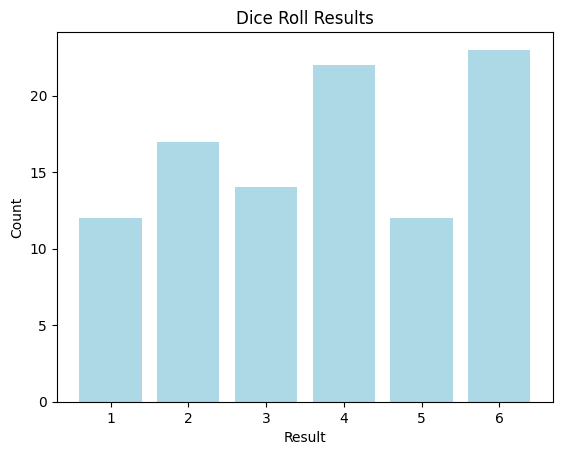

In [41]:
# your code here

path = '../data/roll_the_dice_hundred.csv'
roll_hundred = pd.read_csv(path)
roll_hundred = roll_hundred.sort_values(by='value')
roll_hundred.head(20)

result_counts = roll_hundred['value'].value_counts(sort=False)
plt.bar(result_counts.index, result_counts.values, color='lightblue')
plt.title('Dice Roll Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

In [42]:
roll_hundred

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [43]:
# your code here

dice_mean_1(roll_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [44]:
# your code here
frequency_dist2 = roll_hundred['value'].value_counts()
frequency_dist2

value
6    23
4    22
2    17
3    14
1    12
5    12
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

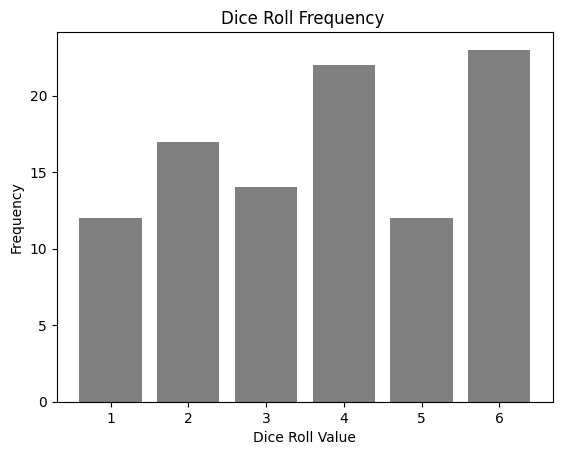

In [50]:
# your code here
plt.bar(frequency_dist2.index, frequency_dist2.values, color="gray")
plt.xlabel('Dice Roll Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency ')
plt.show()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [53]:
# your code here

roll_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_thousand = roll_thousand.drop('Unnamed: 0', axis=1)

frequency_dist = roll_thousand['value'].value_counts().sort_index()
frequency_dist

value
1    175
2    167
3    175
4    168
5    149
6    166
Name: count, dtype: int64

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([  7.,  10.,  23.,  36.,  45.,  70.,  94., 110., 123., 138., 116.,
         78.,  51.,  48.,  21.,  15.,  11.,   3.,   0.,   1.]),
 array([ 1.  ,  5.05,  9.1 , 13.15, 17.2 , 21.25, 25.3 , 29.35, 33.4 ,
        37.45, 41.5 , 45.55, 49.6 , 53.65, 57.7 , 61.75, 65.8 , 69.85,
        73.9 , 77.95, 82.  ]),
 <BarContainer object of 20 artists>)

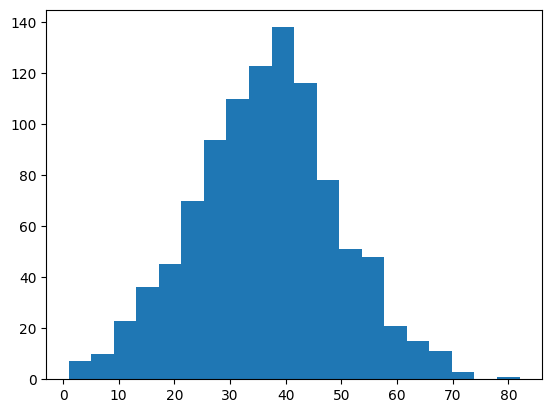

In [56]:
# your code here

path = '../data/ages_population.csv'
ages_population = pd.read_csv(path)
ages_population

result_counts = ages_population['observation'].value_counts(sort=False)
result_counts_df = pd.DataFrame(result_counts).reset_index().rename(columns={'observation': 'frequency'})
result_counts_df

# Calculate mean and median
mean_age = ages_population['observation'].mean()
median_age = ages_population['observation'].median()
std_age = ages_population['observation'].std()


In [57]:
# Mean
mean = ages_population['observation'].mean()
mean

36.56

In [58]:
#Median
median = ages_population['observation'].median()
median

37.0

(array([  7.,  10.,  23.,  36.,  45.,  70.,  94., 110., 123., 138., 116.,
         78.,  51.,  48.,  21.,  15.,  11.,   3.,   0.,   1.]),
 array([ 1.  ,  5.05,  9.1 , 13.15, 17.2 , 21.25, 25.3 , 29.35, 33.4 ,
        37.45, 41.5 , 45.55, 49.6 , 53.65, 57.7 , 61.75, 65.8 , 69.85,
        73.9 , 77.95, 82.  ]),
 <BarContainer object of 20 artists>)

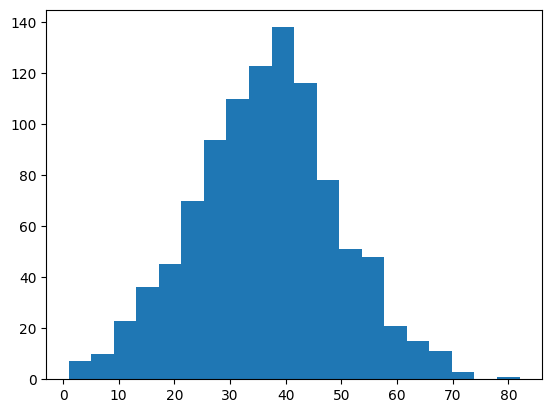

In [59]:
# Plot
plt.hist(ages_population['observation'], bins=20)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [60]:
# your code here

ages_population['observation'].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

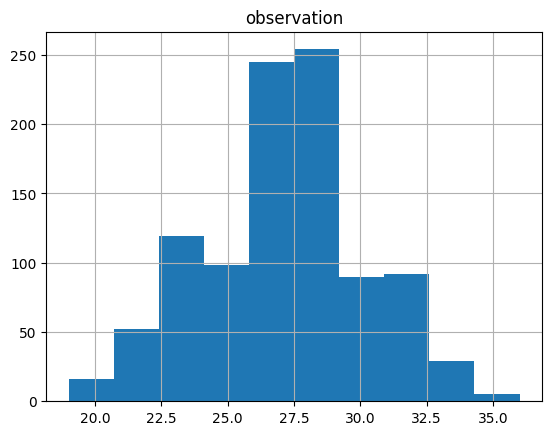

In [64]:
# your code here

ages_population2 = pd.read_csv("../data/ages_population2.csv")
ages_population2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [66]:
# your code here

ages_population2_mean = ages_population2.mean()
ages_population2_std = ages_population2.std()

print("Ages Mean", ages_population2_mean)
print("Ages STD", ages_population2_std)

Ages Mean observation    27.155
dtype: float64
Ages STD observation    2.969814
dtype: float64


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [67]:
# your code here

path = '../data/ages_population3.csv'
ages_population3 = pd.read_csv(path)
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


array([[<Axes: title={'center': 'observation'}>]], dtype=object)

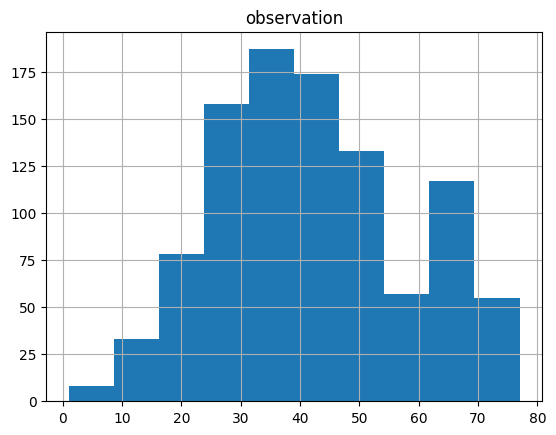

In [69]:
ages_population3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [71]:
# your code here

ages_population3_mean = ages_population3.mean()
ages_population3_std = ages_population3.std()

print("Ages Mean", ages_population3_mean)
print("Ages STD", ages_population3_std)

Ages Mean observation    41.989
dtype: float64
Ages STD observation    16.144706
dtype: float64


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
# your code here

print(ages_population3['observation'].quantile([0.25,0.50,0.75,1]))
print("Difference:", ages_population3.mean()-ages_population3.median())

0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64
Difference: observation    1.989
dtype: float64


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""